In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.imagesource {
    font-size: xx-small;
}
</style>
""")

from datascience import *

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')


import os
import networkx as nx
from networkx.algorithms import bipartite

from IPython.core.display import HTML
def css_styling():
    styles = open("custom_style.css", "r").read()
    return HTML(styles)
css_styling()

## Lab 09 - Affiliation, collaboration, and bipartite networks

Today, we're going to study *affiliation networks*. Affiliation networks can be used to describe the relationships between two different types of nodes.

**TODO FINISH INTRO TO AFFILIATION**

Below is an example of a m

<img src="southern_women_matrix_breiger1974.png">

The Koblenz Network Collection has [digitized](http://konect.uni-koblenz.de/networks/opsahl-southernwomen) this network; we'll read it in now.

In [73]:
sw_dat = []
with open(os.path.join("..", "..", "datasets", "southern-women", "southernwomen.tsv")) as f:
    for line in f:
        # lines beginning with '%' are comments
        if line[0] == '%':
            continue
        sw_dat.append(line.strip())

In [84]:
# each edge goes from a woman to an event;
# to be sure these have unique, non-overlapping ids,
# multiply the events by 10
#sw_dat = [str.split(x)[0] + " " + str(10*int(str.split(x)[1])) for x in sw_dat]

sw_edges = [(("woman_" + (str.split(x)[0])), ("event_" + (str.split(x)[1]))) for x in sw_dat]

all_women = list(set(x[0] for x in sw_edges))
all_events = list(set(x[1] for x in sw_edges))

In [88]:
sw_net = nx.Graph()
sw_net.add_nodes_from(all_women, bipartite=0)
sw_net.add_nodes_from(all_events, bipartite=1)
sw_net.add_edges_from(sw_edges)

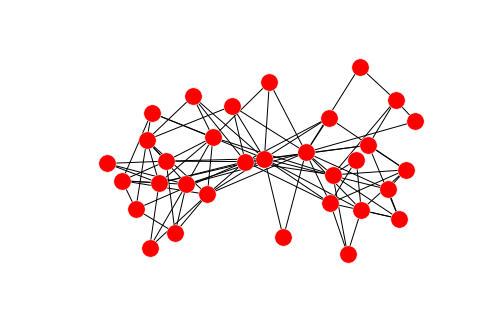

In [89]:
nx.draw(sw_net)

In [111]:
nx.draw?

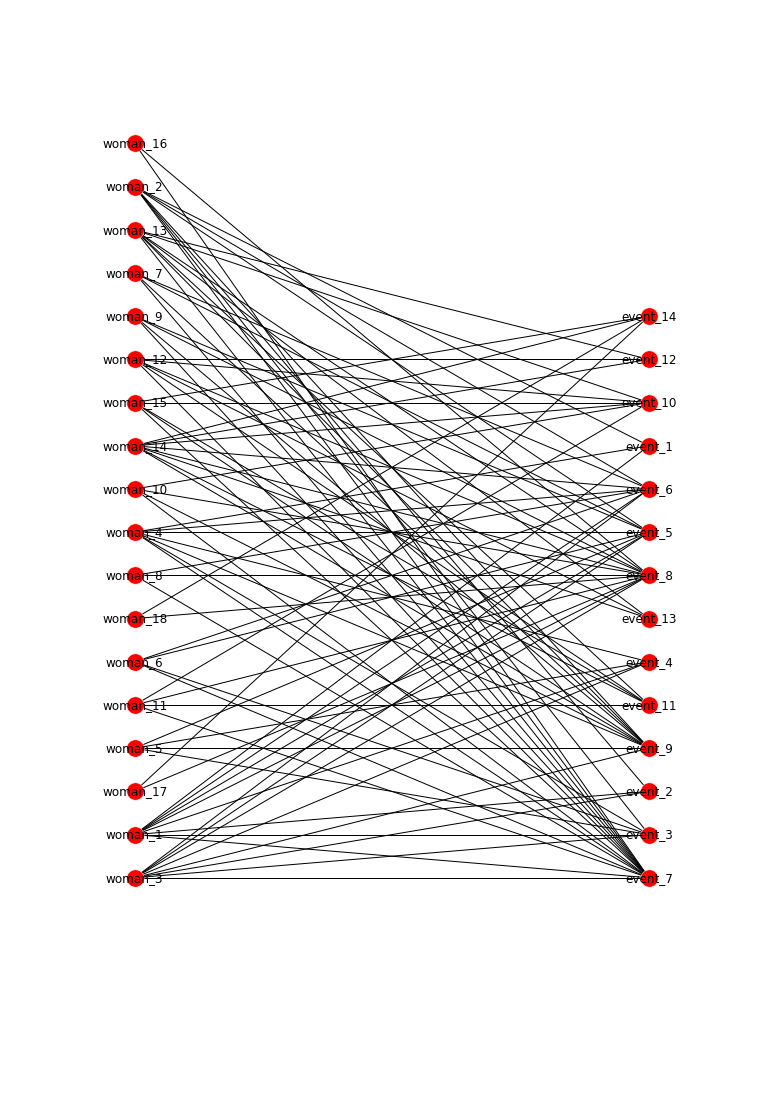

In [114]:
sw_pos = dict()

for idx, node_id in enumerate(all_women):
    sw_pos[node_id] = (1, idx)
    
for idx, node_id in enumerate(all_events):
    sw_pos[node_id] = (2, idx)

plt.figure(figsize=(10,15))
nx.draw(sw_net, pos=sw_pos, with_labels=True)
#plt.show()

**TODO a toy example**

**TODO a toy exercise w/ partners**

**TODO OVERVIEW OF DATASET**

[Here](https://github.com/USATODAY/data/blob/master/082016-superpac-megadonors/readme.md) is a description.

**Question TODO** Open up the dataset, make some plots

In [ ]:
pacdat = Table().from_csv?

In [ ]:
pacdat = Table().read_table("../data/USATODAY/data/082016-superpac-megadonors/megadonor_contributions.csv")

In [ ]:
pacdat

**Question TODO** Create a dataset that has

* LinkedDonor
* Committee
* total_donated

**Question TODO** Create a dataset `donor_supports` that has

* LinkedDonor
* PAC_view of PAC with highest donation

**Question TODO** Starting from  `donor_supports`, create a new column called `view` that recodes `PAC_view` in the following way:

* 'L' and 'D' -> 'D'
* 'C' and 'R' -> 'R'
* 'N' stays the same

**Question TODO** Construct a bi-partite network that links donors to PACs

**Question TODO** Some basic summaries of that network (degree distn, etc)

**Question TODO** Construct a projected network of donors, where donors are connected by an edge if they both donated to the same PAC

**Question** Look at transitivity, homophily, etc in this projected network

In [ ]:
# see http://stackoverflow.com/questions/1518522/python-most-common-element-in-a-list
def most_common(a):
    (values,counts) = np.unique(a,return_counts=True)
    ind=np.argmax(counts)
    return(values[ind])  # prints the most frequent element

In [ ]:
pacdat_small_agg = pacdat.select(['LinkedDonorID', 'PAC_view']).groups(labels=['LinkedDonorID', 'PAC_view'], collect=most_common)

In [ ]:
pacdat_small_agg

In [ ]:
pacdat_small = pacdat.select(['CommID', 'ContAmt', 'LinkedDonorID'])

In [ ]:
pacdat_small_agg = pacdat_small.groups(labels=['CommID', 'LinkedDonorID'], collect=np.sum)

In [ ]:
pacdat_small_agg

In [ ]:
g = nx.Graph()
g.add_nodes_from(pacdat_small_agg[0], bipartite=0)
g.add_nodes_from(pacdat_small_agg[1], bipartite=1)

In [ ]:
edges = zip(pacdat_small_agg[0], pacdat_small_agg[1])

In [ ]:
for e in edges:
    g.add_edge(e[0], e[1])

In [ ]:
nx.draw(g)

In [ ]:
pacs, donors = bipartite.sets(g)

vscale = 10

pos = dict()
pos.update( (n, (1, i*vscale)) for i, n in enumerate(pacs) ) # put nodes from X at x=1
pos.update( (n, (2, i*vscale)) for i, n in enumerate(donors) ) # put nodes from Y at x=2
nx.draw(g, pos=pos)
plt.show()

In [ ]:
pac_network = bipartite.projected_graph(g, pacs)

In [ ]:
donor_network = bipartite.projected_graph(g, donors)

In [ ]:
nx.draw(pac_network)

In [ ]:
nx.draw(donor_network)